In [1]:
import json

import pandas as pd
import pickle

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.preprocessing import OrdinalEncoder

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [4]:
import datetime

In [5]:
import medusa_model_n as mm

In [6]:
with open('train_data.json') as json_file:
    data = json.load(json_file)

In [22]:
data[1]

{'inactive_in_future': True,
 'sample': {'fe_struct': {'center_mass_x': 112.0,
   'center_mass_y': -99.0,
   'date': '2022-04-20',
   'distance_to_origin': 149.48,
   'inactive_in_current': 'undefined',
   'n_villages': 1,
   'player_id': 'https://ts3.x1.europe.travian.com--P--14043',
   'total_population': 33,
   'tribes_summary': {'teutons': 1}},
  'fe_type': 'ndays_1'}}

In [23]:
#data_1 = [(x["sample"]["fe_struct"], x["inactive_in_future"]) for x in data if x["sample"]["fe_type"] == "ndays_1"]
data_n = [(x["sample"]["fe_struct"], x["inactive_in_future"]) for x in data if x["sample"]["fe_type"] == "ndays_n"]

In [24]:
len(data_n)

102879

In [25]:
data_n[0]

({'center_mass_x': 112.0,
  'center_mass_y': -99.0,
  'date': '2022-04-21',
  'distance_to_origin': 149.48,
  'dow': 4,
  'inactive_in_current': True,
  'n_days': 2,
  'n_village_decrease': 0,
  'n_village_increase': 0,
  'n_villages': 1,
  'player_id': 'https://ts3.x1.europe.travian.com--P--14043',
  'prev_distance_to_origin': 149.48,
  'total_population': 33,
  'total_population_decrease': 0,
  'total_population_increase': 0,
  'tribes_summary': {'teutons': 1}},
 True)

In [27]:
df = pd.DataFrame([mm.process_train_row(x) for x in data_n])
df

,do,weekend,weekday,dow,n_villages,total_population,player_id,y
0,149.48,False,3,4,1,33,https://ts3.x1.europe.travian.com--P--14043,True
1,149.48,False,2,3,1,33,https://ts3.x1.europe.travian.com--P--14043,True
2,149.48,False,1,2,1,33,https://ts3.x1.europe.travian.com--P--14043,True
3,149.48,False,0,1,1,33,https://ts3.x1.europe.travian.com--P--14043,True
4,149.48,True,6,7,1,33,https://ts3.x1.europe.travian.com--P--14043,True
...,...,...,...,...,...,...,...,...
102874,134.71,False,1,2,1,14,https://ts3.x1.europe.travian.com--P--11046,True
102875,134.71,False,0,1,1,14,https://ts3.x1.europe.travian.com--P--11046,True
102876,134.71,False,2,3,1,14,https://ts3.x1.europe.travian.com--P--11046,True
102877,134.71,False,1,2,1,14,https://ts3.x1.europe.travian.com--P--11046,True


In [28]:
pid = df["player_id"].values
y = df["y"].values
X = df[df.columns.to_list()[:-2]].values
X

array([[149.48, False, 3, 4, 1, 33],
       [149.48, False, 2, 3, 1, 33],
       [149.48, False, 1, 2, 1, 33],
       ...,
       [134.71, False, 2, 3, 1, 14],
       [134.71, False, 1, 2, 1, 14],
       [134.71, False, 2, 3, 1, 14]], dtype=object)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [30]:
clf = RandomForestClassifier(n_estimators=1500, max_depth=None)

In [31]:
%%time
clf.fit(X_train, y_train)

CPU times: user 1min 13s, sys: 148 ms, total: 1min 13s
Wall time: 1min 13s


RandomForestClassifier(n_estimators=1500)

In [32]:
clf.score(X_test, y_test)

0.9906687402799378

In [33]:
pd.DataFrame(clf.feature_importances_, index=df.columns.to_list()[:-2], columns=["feature importance"]).sort_values("feature importance", ascending=False)

,feature importance
total_population,0.563508
n_villages,0.274119
do,0.158318
dow,0.001900
weekday,0.001882
weekend,0.000273


In [34]:
confusion_matrix(y_test, clf.predict(X_test))

array([[10228,   129],
       [  111, 15252]])

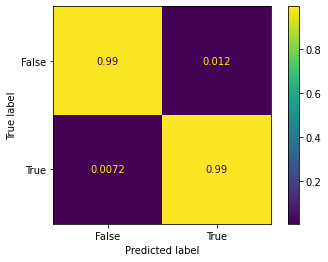

In [35]:
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
_ = disp.plot()

In [36]:
pickle.dump(clf, open("medusa_model_n.pkl", "wb"))

In [13]:
from importlib import reload

In [26]:
reload(mm)

<module 'medusa_model_n' from '/home/jorge/Proyectos/my_travian/apps/medusa/priv/medusa_model_n.py'>

In [18]:
data_to_test = [x[0] for x in data_n]
data_to_test[0]

{'center_mass_x': 112.0,
 'center_mass_y': -99.0,
 'date': '2022-04-21',
 'distance_to_origin': 149.48,
 'dow': 4,
 'inactive_in_current': True,
 'n_days': 2,
 'n_village_decrease': 0,
 'n_village_increase': 0,
 'n_villages': 1,
 'player_id': 'https://ts3.x1.europe.travian.com--P--14043',
 'prev_distance_to_origin': 149.48,
 'total_population': 33,
 'total_population_decrease': 0,
 'total_population_increase': 0,
 'tribes_summary': {'teutons': 1}}

In [37]:
medusa = mm.medusa_model_n("medusa_model_n.pkl")

In [38]:
res = medusa.predict(data_to_test)
res

('player_n',
 [('https://ts3.x1.europe.travian.com--P--14043', True),
  ('https://ts3.x1.europe.travian.com--P--14043', True),
  ('https://ts3.x1.europe.travian.com--P--14043', True),
  ('https://ts3.x1.europe.travian.com--P--14043', True),
  ('https://ts3.x1.europe.travian.com--P--14043', True),
  ('https://ts3.x1.europe.travian.com--P--14043', True),
  ('https://ts3.x1.europe.travian.com--P--14043', True),
  ('https://ts3.x1.europe.travian.com--P--14043', True),
  ('https://ts3.x1.europe.travian.com--P--14043', True),
  ('https://ts3.x1.europe.travian.com--P--14043', True),
  ('https://ts3.x1.europe.travian.com--P--14043', True),
  ('https://ts3.x1.europe.travian.com--P--14043', True),
  ('https://ts3.x1.europe.travian.com--P--14043', True),
  ('https://ts3.x1.europe.travian.com--P--14043', True),
  ('https://ts3.x1.europe.travian.com--P--5990', False),
  ('https://ts3.x1.europe.travian.com--P--5990', False),
  ('https://ts3.x1.europe.travian.com--P--5990', False),
  ('https://ts3.x1